In [72]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

sns.set_theme()

In [29]:
employment= pd.read_csv("emp.csv", encoding='latin-1')
employment.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAEMP25N,10.0,...,Total employment (number of jobs),Number of jobs,165522200,165095100,...,172901700,176091700,178979700,182325100,186233800,190325800,193378900,196337100,200284200,203809500
1,"""00000""",United States,,CAEMP25N,20.0,...,Wage and salary employment,Number of jobs,137334000,136301000,...,135393000,136918000,139619000,141932000,144722000,147641000,149913000,151892000,154365000,156445000
2,"""00000""",United States,,CAEMP25N,40.0,...,Proprietors employment,Number of jobs,28188200,28794100,...,37508700,39173700,39360700,40393100,41511800,42684800,43465900,44445100,45919200,47364500
3,"""00000""",United States,,CAEMP25N,50.0,...,Farm proprietors employment,Number of jobs,2190000,2032000,...,1882000,1876000,1844000,1856000,1840000,1834000,1824000,1803000,1792000,1787000
4,"""00000""",United States,,CAEMP25N,60.0,...,Nonfarm proprietors employment 2/,Number of jobs,25998200,26762100,...,35626700,37297700,37516700,38537100,39671800,40850800,41641900,42642100,44127200,45577500


In [32]:
columns = list(employment.columns)
new_columns = ["GeoName", "Description"] + columns[-20:]
new_columns

['GeoName',
 'Description',
 'Unit',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [47]:
df = employment[new_columns]
df.head(1)

,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Total employment (number of jobs),Number of jobs,165522200,165095100,165921500,168839700,172338400,175868600,179543700,...,172901700,176091700,178979700,182325100,186233800,190325800,193378900,196337100,200284200,203809500


In [70]:
geos = df.query("GeoName == 'United States' and Description == 'Total employment (number of jobs)'")
geos = geos.T
geos = geos.iloc[3:]
geos[0] = pd.to_numeric(geos[0])
geos.reset_index(inplace=True)
geos.rename(columns = {'index':'Year', 0:'Total'}, inplace = True)

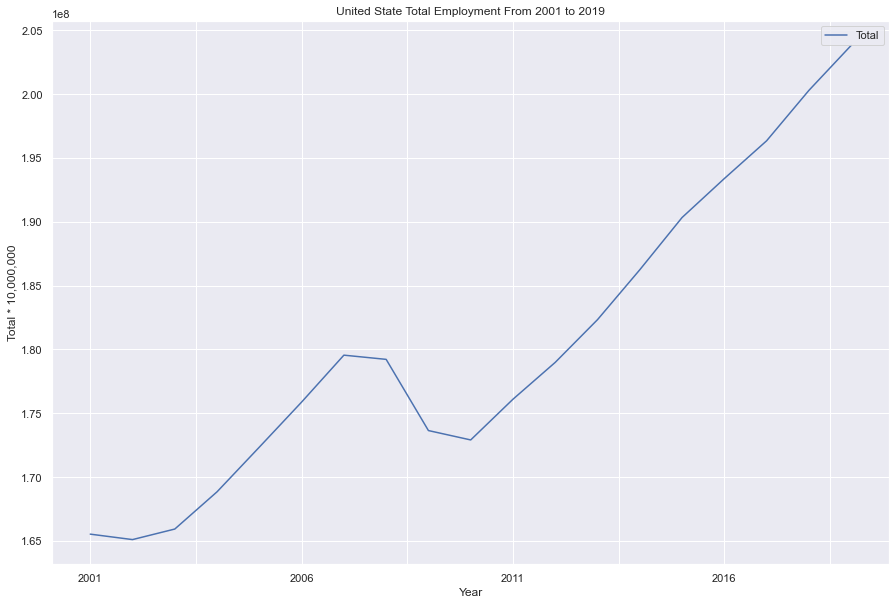

In [93]:
ax = geos.plot(
    figsize=(15, 10), 
    kind="line", x="Year", 
    y="Total", 
    ylabel="Total * 10,000,000", 
    title="United State Total Employment From 2001 to 2019",
)
ax.figure.savefig("test.png")